# **Custom CNN for MNIST dataset**

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import numpy as np

In [ ]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


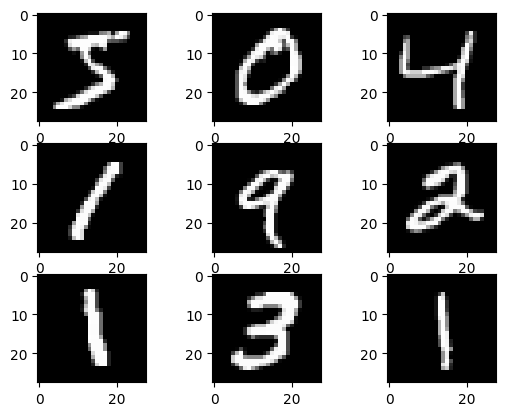

In [ ]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = mnist.load_data()
 # reshape dataset to have a single channel
 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
 testX = testX.reshape((testX.shape[0], 28, 28, 1))
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [ ]:
# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
 scores, histories = list(), list()
 # prepare cross validation
 kfold = KFold(n_folds, shuffle=True, random_state=1)
 # enumerate splits
 for train_ix, test_ix in kfold.split(dataX):
  # define model
  model = define_model()
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
  # fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # stores scores
  scores.append(acc)
  histories.append(history)
  return scores, histories

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
 for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

In [ ]:
# summarize model performance
def summarize_performance(scores):
 # print summary
 print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
 # box and whisker plots of results
 plt.boxplot(scores)
 plt.show()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
 # load dataset
 trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)
 # evaluate model
 scores, histories = evaluate_model(trainX, trainY)
 # learning curves
 summarize_diagnostics(histories)
 # summarize estimated performance
 summarize_performance(scores)

> 98.492


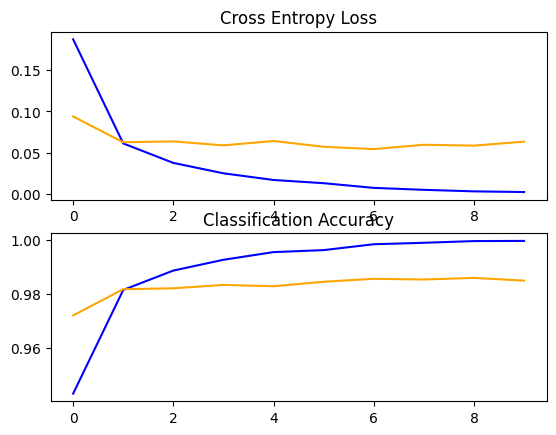

Accuracy: mean=98.492 std=0.000, n=1


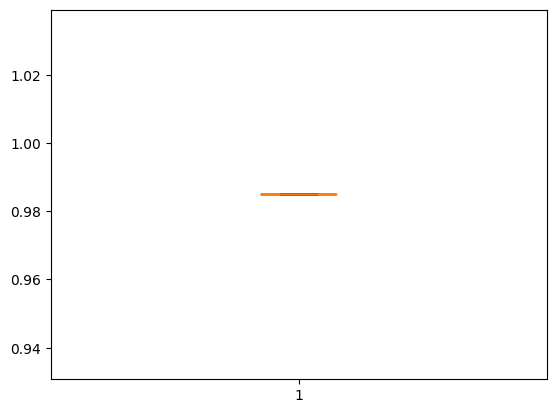

In [ ]:
# entry point, run the test harness
run_test_harness()

# **Custom CNN on custom dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Specify the path to your main data directory
data_dir = '/content/drive/MyDrive/BUSI/'

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255,  # Normalize pixel values to [0, 1]
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

# Specify the dimensions of your images
img_width, img_height = 224, 224

# Create a generator for reading and augmenting images from the specified directory
generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=32,  # Adjust the batch size based on your requirements
    class_mode='categorical'  # Adjust if you have a different classification task
)

# Access the class labels
class_labels = generator.class_indices
print("Class Labels:", class_labels)

# Access the number of classes
num_classes = len(class_labels)
print("Number of Classes:", num_classes)


Found 780 images belonging to 3 classes.
Class Labels: {'class_0': 0, 'class_1': 1, 'class_2': 2}
Number of Classes: 3


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Define the CNN model (use the architecture defined earlier)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Assuming you have 'num_classes' classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

In [ ]:
# Fit the model to the data
model.fit(generator, epochs=10)  # Adjust the number of epochs based on your requirements

Epoch 1/10
25/25 [==============================] - 142s 5s/step - loss: 1.1094 - accuracy: 0.5103
Epoch 2/10
25/25 [==============================] - 21s 863ms/step - loss: 0.9042 - accuracy: 0.6077
Epoch 3/10
25/25 [==============================] - 20s 812ms/step - loss: 0.8596 - accuracy: 0.6218
Epoch 4/10
25/25 [==============================] - 18s 712ms/step - loss: 0.7977 - accuracy: 0.6410
Epoch 5/10
25/25 [==============================] - 19s 768ms/step - loss: 0.7586 - accuracy: 0.6833
Epoch 6/10
25/25 [==============================] - 20s 766ms/step - loss: 0.7308 - accuracy: 0.7077
Epoch 7/10
25/25 [==============================] - 18s 713ms/step - loss: 0.6849 - accuracy: 0.7077
Epoch 8/10
25/25 [==============================] - 19s 766ms/step - loss: 0.6322 - accuracy: 0.7333
Epoch 9/10
25/25 [==============================] - 18s 716ms/step - loss: 0.6409 - accuracy: 0.7359
Epoch 10/10
25/25 [==============================] - 18s 747ms/step - loss: 0.6163 - accuracy

# **Loading private dataset and designing one CNN using pre-trained networks**

In [ ]:
import os
import numpy as np
np.random.seed(777)
import math
import keras
import keras.backend as K
import h5py
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.models import Model
#from keras.layers import merge
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, add, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score
from keras.regularizers import l2
from keras.applications.xception import Xception, preprocess_input
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications import DenseNet201
from keras.applications import DenseNet121

from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Lambda,Concatenate
from keras.layers import SeparableConv2D, AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Add

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

In [ ]:
# directories of train, test and validation
train_dir = '/content/drive/My Drive/BUSI/'
#test_dir = '/content/drive/My Drive/BUSI/'
#valid_dir = '/content/drive/My Drive/BUSI/'

#extracted_features_dir = '/content/drive/My Drive/data_v3/extracted_features/'

In [ ]:
import keras
import tensorflow as tf
import keras.backend as K

print("Keras Version", keras.__version__)
print("tensorflow Version", tf.__version__)

Keras Version 2.15.0
tensorflow Version 2.15.0


In [ ]:
# train , test and valid size

batch_size = 32
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)
epochs = 1000


for root,dirs,files in os.walk(train_dir):
    print (root, len(files))

print("*"*30)
#for root,dirs,files in os.walk(test_dir):
#    print (root, len(files))

#print("*"*30)
#for root,dirs,files in os.walk(valid_dir):
#    print (root, len(files))

/content/drive/My Drive/BUSI/ 0
/content/drive/My Drive/BUSI/class_2 437
/content/drive/My Drive/BUSI/class_0 133
/content/drive/My Drive/BUSI/class_1 210
******************************


In [ ]:
random_seed = np.random.seed(1142)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.25,
    zoom_range=0.2,
    shear_range=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')


Found 780 images belonging to 3 classes.


In [ ]:
nb_train_samples = len(train_generator.filenames)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))


num_classes = len(train_generator.class_indices)

print("nb_train_samples:", nb_train_samples)
#print("nb_validation_samples:", nb_validation_samples)
print("\npredict_size_train:", predict_size_train)
#print("predict_size_validation:", predict_size_validation)
# print("nb_test_without_aug_samples:", nb_test_without_aug_samples)
# print("predict_size_test_without_aug_samples:", predict_size_test_without_aug)
#print("nb_test_samples:", nb_test_samples)
#print("predict_size_test:", predict_size_test)

print("\n num_classes:", num_classes)

nb_train_samples: 780

predict_size_train: 25

 num_classes: 3


In [ ]:
from keras.applications.densenet import DenseNet169
from keras.applications.inception_v3 import InceptionV3
from keras.applications.nasnet import NASNetMobile
from keras.applications import VGG19

input_tensor = Input(shape = input_shape)

base_model1=NASNetMobile(input_shape= input_shape,weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model2=InceptionV3(input_shape= input_shape,weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model3=DenseNet201(input_shape= input_shape,weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model4=VGG19(input_shape= input_shape,weights='imagenet', include_top=False, input_tensor=input_tensor)

x1 = base_model1.output
x1 = GlobalAveragePooling2D()(x1)

x2 = base_model2.output
x2 = GlobalAveragePooling2D()(x2)

x3 = base_model3.output
x3 = GlobalAveragePooling2D()(x3)

x4 = base_model4.output
x4 = GlobalAveragePooling2D()(x4)

merge = concatenate([x1, x2, x3 , x4])
predictions = Dense(num_classes, activation='softmax')(merge)

model = Model(inputs=input_tensor,outputs=predictions)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
bottleneck_final_model = Model(inputs=model.input, outputs=merge)

In [ ]:
bottleneck_features_train = bottleneck_final_model.predict_generator(train_generator, predict_size_train)
#np.save(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy', bottleneck_features_train)

<ipython-input-24-5f892697e573>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = bottleneck_final_model.predict_generator(train_generator, predict_size_train)
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
#bottleneck_features_validation = bottleneck_final_model.predict_generator(validation_generator, predict_size_validation)
#np.save(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy', bottleneck_features_validation)

In [ ]:
#bottleneck_features_test = bottleneck_final_model.predict_generator(test_generator, predict_size_test)
#np.save(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy', bottleneck_features_test)


In [ ]:
# training call backs
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, epsilon=0.0001, patience=3, verbose=1)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
from sklearn.model_selection import train_test_split
epochs = 1000
train_data = bottleneck_features_train
#validation_data = bottleneck_features_validation
#test_data = bottleneck_features_test

train_labels = train_generator.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)

#validation_labels = validation_generator.classes
#validation_labels = to_categorical(validation_labels, num_classes=num_classes)

#test_labels = test_generator.classes
#test_labels = to_categorical(test_labels, num_classes=num_classes)

train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

dropout_rate = 0.5

model = Sequential()
# model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation=tf.nn.softmax))

#adam_opt2=Adam(lr = 0.0001, beta_1=0.7, beta_2=0.995, amsgrad=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[lr_reduce, es_callback],
                    validation_data=(train_data, train_labels),
                    verbose= 1)

Epoch 1/1000
20/20 [==============================] - 2s 15ms/step - loss: 1.0087 - accuracy: 0.5449 - val_loss: 0.7648 - val_accuracy: 0.6426 - lr: 1.0000e-04
Epoch 2/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.7675 - accuracy: 0.6554 - val_loss: 0.5931 - val_accuracy: 0.7821 - lr: 1.0000e-04
Epoch 3/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.6282 - accuracy: 0.7468 - val_loss: 0.5117 - val_accuracy: 0.8237 - lr: 1.0000e-04
Epoch 4/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.5705 - accuracy: 0.7660 - val_loss: 0.4568 - val_accuracy: 0.8526 - lr: 1.0000e-04
Epoch 5/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.5230 - accuracy: 0.7949 - val_loss: 0.4402 - val_accuracy: 0.8494 - lr: 1.0000e-04
Epoch 6/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.4799 - accuracy: 0.8061 - val_loss: 0.3838 - val_accuracy: 0.8798 - lr: 1.0000e-04
Epoch 7/1000
20/20 [========================

In [ ]:
preds = model.predict(test_data)

predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

5/5 [==============================] - 0s 2ms/step
Accuracy 0.782051282051282


Confusion Matrix
[[19  1  8]
 [ 1 28 13]
 [ 6  5 75]]


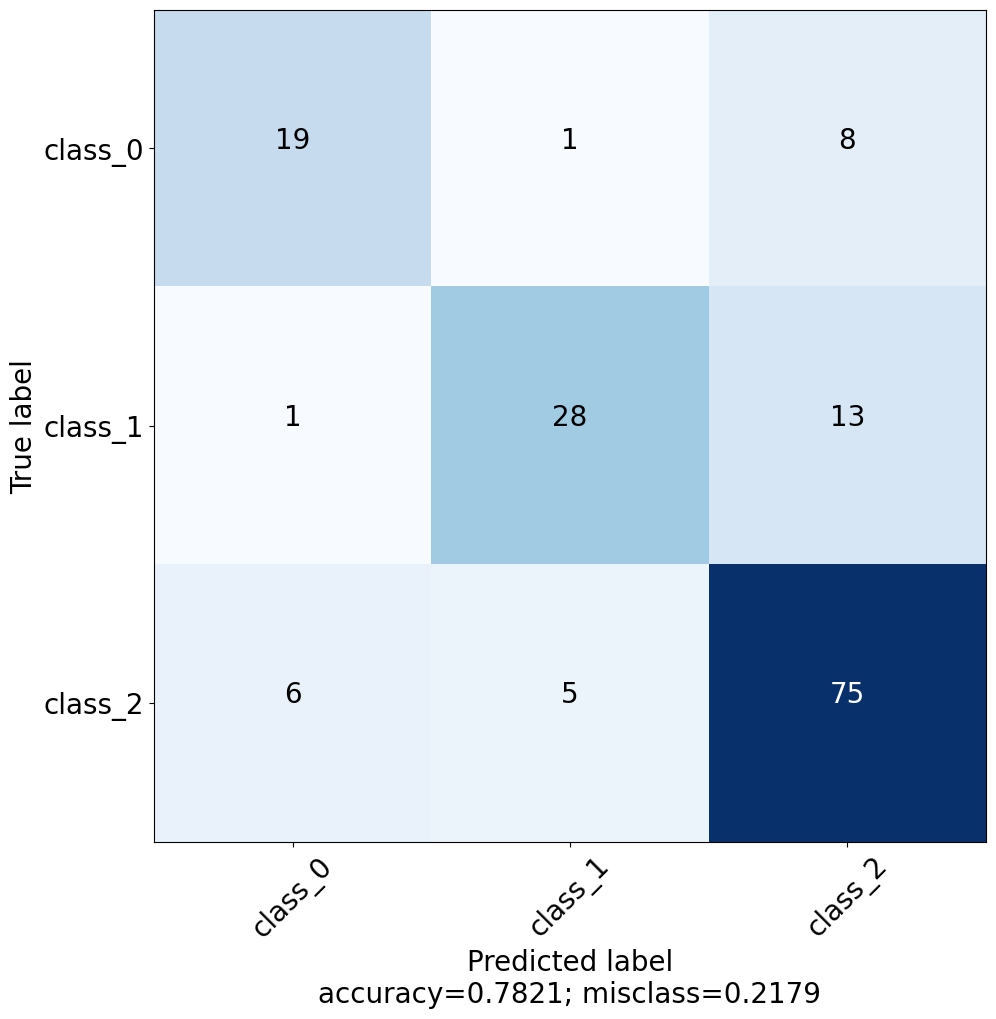

In [ ]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

labels = []

label = train_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

for k,v in indexlabel.items():
    labels.append(v)

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    #plt.savefig('/content/drive/My Drive/data_v3/extracted_features/confusion_marix.png', bbox_inches='tight', dpi = 100)


plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=labels, title=' ')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred=predictions
y_pred_probabilities=y_pred

# y_pred = np.argmax(y_pred,axis = 1)
y_actual = y_true

classnames=[]
for classname in train_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred)
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

[[19  1  8]
 [ 1 28 13]
 [ 6  5 75]]
              precision    recall  f1-score   support

     class_0       0.73      0.68      0.70        28
     class_1       0.82      0.67      0.74        42
     class_2       0.78      0.87      0.82        86

    accuracy                           0.78       156
   macro avg       0.78      0.74      0.75       156
weighted avg       0.78      0.78      0.78       156



<ipython-input-32-22cc36765a8f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-ticks")


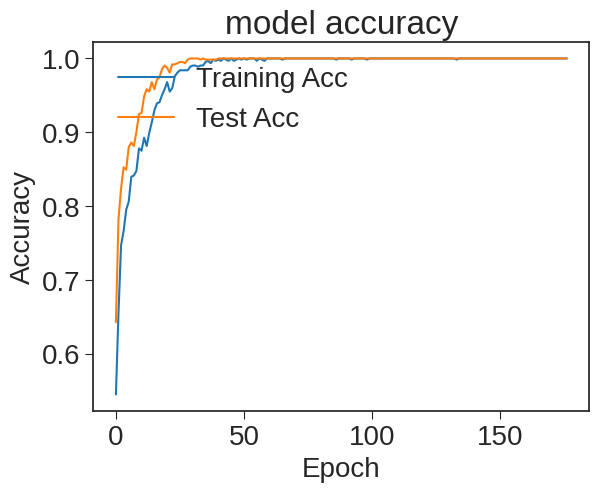

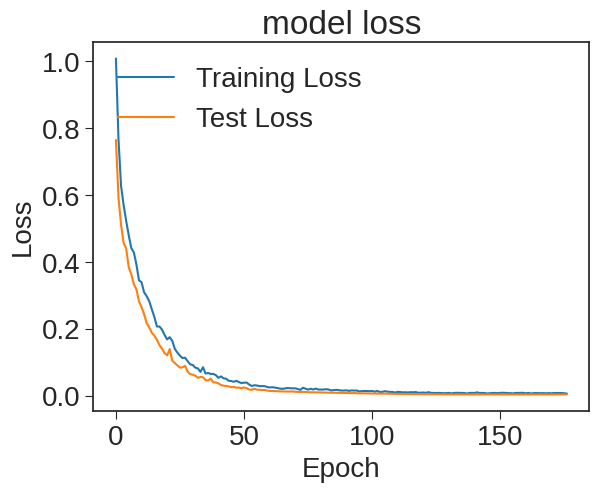

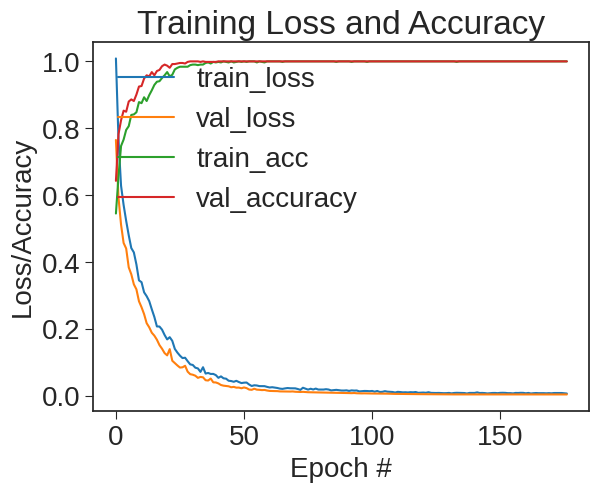

In [ ]:
plt.style.use("seaborn-ticks")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Test Acc'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/My Drive/data_v3/extracted_features/model_pogress.png', bbox_inches='tight', dpi = 100)

plt.figure()
N = len(history.history['accuracy'])
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
#plt.savefig('/content/drive/My Drive/data_v3/extracted_features/loss.png', bbox_inches='tight', dpi = 100)